In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
#load the data - fashion mnist
fashionmnist = tf.keras.datasets.fashion_mnist
(xtrain,ytrain), (xtest, ytest) = fashionmnist.load_data()
xtrain,xtest = xtrain/255.0, xtest/255.0
print("xtrain.shape: ", xtrain.shape)

xtrain.shape:  (60000, 28, 28)


In [ ]:
#data is 2d we need to make it 3d, because it has grayscale images
xtrain = np.expand_dims(xtrain,-1)
xtest = np.expand_dims(xtest, -1)
print("xtrain.shape: ",xtrain.shape)

xtrain.shape:  (60000, 28, 28, 1)


In [ ]:
k = len(set(ytrain))
print("number of classes: ", k)

number of classes:  10


In [ ]:
#building the model using functional api:
i = Input(shape=xtrain[0].shape)
x = Conv2D(32,(3,3),strides=2,activation='relu', padding='same')(i)
x = Conv2D(64,(3,3),strides=2,activation='relu', padding='same')(x)
x = Conv2D(128,(3,3),strides=2,activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x)
model = Model(i,x)

In [ ]:
#compile and fit:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(xtrain,ytrain, validation_data=(xtest,ytest), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 42s 22ms/step - loss: 0.4319 - accuracy: 0.8440 - val_loss: 0.3615 - val_accuracy: 0.8656
Epoch 2/15
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2912 - accuracy: 0.8918 - val_loss: 0.3054 - val_accuracy: 0.8849
Epoch 3/15
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2444 - accuracy: 0.9082 - val_loss: 0.2731 - val_accuracy: 0.9022
Epoch 4/15
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2142 - accuracy: 0.9195 - val_loss: 0.2498 - val_accuracy: 0.9084
Epoch 5/15
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1882 - accuracy: 0.9301 - val_loss: 0.2587 - val_accuracy: 0.9098
Epoch 6/15
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1672 - accuracy: 0.9364 - val_loss: 0.2533 - val_accuracy: 0.9089
Epoch 7/15
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1480 - accuracy: 0.9433 - val_loss: 0.2579 -

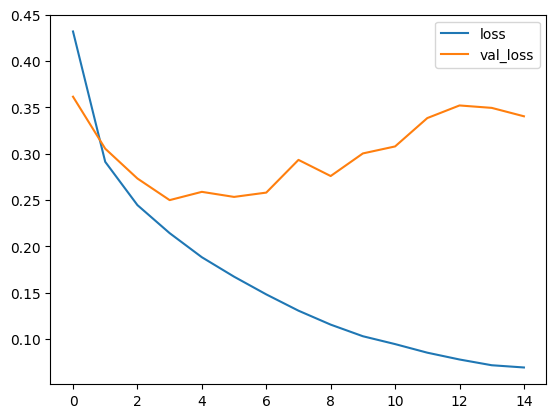

In [ ]:
#plot loss per iteration:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

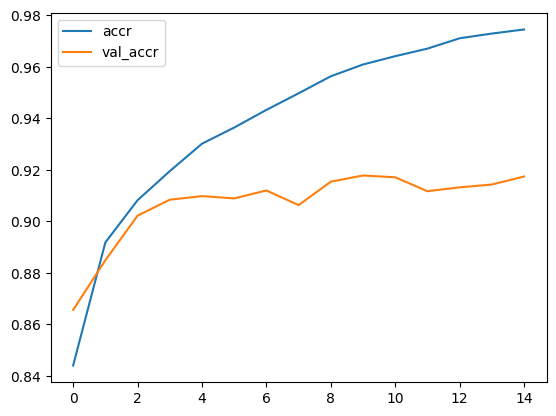

In [ ]:
#accuracy plots per iteration, model is more confident in incorrect predictions:
plt.plot(r.history['accuracy'], label='accr')
plt.plot(r.history['val_accuracy'], label='val_accr')
plt.legend()

313/313 [==============================] - 2s 5ms/step
confusion matrix without normalisation
[[869   1  18  11   4   1  89   0   6   1]
 [  1 985   0   9   2   0   2   0   1   0]
 [ 15   1 879   5  51   0  49   0   0   0]
 [ 14   3   6 932  20   0  23   0   2   0]
 [  1   1  46  23 887   0  40   0   2   0]
 [  0   0   0   0   0 973   0  20   0   7]
 [102   1  66  21  74   0 730   0   6   0]
 [  0   0   0   0   0   2   0 988   0  10]
 [  2   1   1   3   4   1   5   3 980   0]
 [  0   0   0   0   1   4   1  43   0 951]]


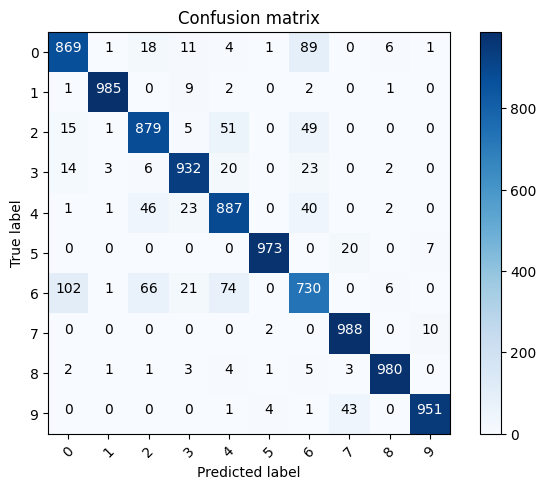

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("normalised confusion matrix")
    else:
        print("confusion matrix without normalisation")
    print(cm)
    plt.imshow(cm,interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tickmarks = np.arange(len(classes))
    plt.xticks(tickmarks,classes,rotation=45)
    plt.yticks(tickmarks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

ptest = model.predict(xtest).argmax(axis=1)
cm = confusion_matrix(ytest,ptest)
plot_confusion_matrix(cm,list(range(10)))

In [ ]:
labels='''T-shirt/Top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle Boot'''.split()

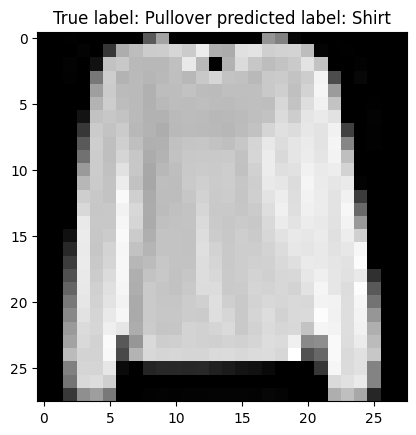

In [ ]:
#misclassified examples:
miss = np.where(ptest!=ytest)[0]
i = np.random.choice(miss)
plt.imshow(xtest[i].reshape(28,28),cmap='gray')
plt.title("True label: %s predicted label: %s" % (labels[ytest[i]], labels[ptest[i]]));